<a href="https://colab.research.google.com/github/FernandoZR83/ANN_DL_ML/blob/master/Replica_de_CNN_con_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ejemplo Regresion con tensorflow

In [1]:
!git clone 'https://github.com/FernandoZR83/ANN_DL_ML/'

Cloning into 'ANN_DL_ML'...
remote: Enumerating objects: 57, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 57 (delta 21), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (57/57), done.


In [0]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import sklearn 
import sys

In [0]:
sys.path.append('ANN_DL_ML')
import planar_utils

In [0]:
from planar_utils import plot_decision_boundary, sigmoid

%matplotlib inline

np.random.seed(1) # set a seed so that the results are consistent over iterations

In [0]:
def load_extra_datasets():  
    N = 200
    gaussian_quantiles = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.7, n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None)
    return  gaussian_quantiles

X1 [-6.65119181e-01 -1.06924984e+00  6.50703764e-01 -3.16471737e-01
 -8.21071068e-01 -2.30508821e-01 -1.13656702e+00  1.57835176e+00
  6.34228735e-01 -9.75538264e-01 -1.66424433e+00  1.41400715e-01
 -8.16062028e-01  5.49696238e-01 -3.96003586e-01  9.33357586e-01
 -4.23583157e-01 -6.61010116e-01 -9.93112673e-01 -1.34281424e-01
 -2.72543478e-01  1.34356929e-05 -2.55732172e-01 -2.70938252e-01
 -4.58013041e-01 -9.18649035e-01  1.19554744e+00 -2.81152724e-01
 -8.34798083e-01 -5.41196228e-01  6.24179122e-01  3.13354084e-01
 -5.25384042e-01 -6.87130025e-01  3.20463968e-02 -4.08728106e-02
  2.76933684e-01  6.18204481e-01 -2.04726493e-01 -1.44849764e-01
  1.62630051e+00 -5.17654264e-01 -1.09756595e+00 -5.22048189e-02
 -8.65979200e-01 -2.18827664e+00 -1.20089115e-01  9.48145265e-01
  1.12688789e+00 -1.00910939e-01 -4.00917536e-01  4.62188313e-01
 -2.23026804e-01  2.99323857e-01 -1.14696687e-02 -9.93956902e-01
 -2.88653810e-01 -5.20002961e-01 -8.35303931e-01  1.01553857e+00
 -8.99271905e-01  8.08

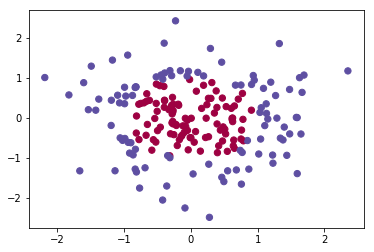

In [14]:
gaussian_quantiles= load_extra_datasets()
X, Y = gaussian_quantiles
X, Y = X.T, Y.reshape(1, Y.shape[0])
print("X1", X[0,:], "X2", X[1,:])
print("output", Y[0,:])
# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y[0,:], s=40, cmap=plt.cm.Spectral);

In [15]:
#Simple logistic regression
# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV();
clf.fit(X.T, Y.T);

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [18]:
print(clf.predict_proba(X.T))

[[0.50254886 0.49745114]
 [0.50505534 0.49494466]
 [0.49914116 0.50085884]
 [0.50546363 0.49453637]
 [0.50215599 0.49784401]
 [0.49271205 0.50728795]
 [0.5116077  0.4883923 ]
 [0.49092436 0.50907564]
 [0.49901428 0.50098572]
 [0.50388864 0.49611136]
 [0.5146904  0.4853096 ]
 [0.50236825 0.49763175]
 [0.50984688 0.49015312]
 [0.50177325 0.49822675]
 [0.50088026 0.49911974]
 [0.49088536 0.50911464]
 [0.51010371 0.48989629]
 [0.50184255 0.49815745]
 [0.50468649 0.49531351]
 [0.50254289 0.49745711]
 [0.5020859  0.4979141 ]
 [0.50198036 0.49801964]
 [0.50319136 0.49680864]
 [0.50121536 0.49878464]
 [0.50369053 0.49630947]
 [0.50873062 0.49126938]
 [0.48996114 0.51003886]
 [0.50145782 0.49854218]
 [0.50969278 0.49030722]
 [0.50338673 0.49661327]
 [0.49654707 0.50345293]
 [0.49514293 0.50485707]
 [0.5054378  0.4945622 ]
 [0.50871672 0.49128328]
 [0.50507719 0.49492281]
 [0.50331687 0.49668313]
 [0.50758671 0.49241329]
 [0.49674579 0.50325421]
 [0.50387992 0.49612008]
 [0.50271285 0.49728715]


In [20]:
print(1/(1+np.exp(-clf.intercept_-np.dot(clf.coef_,X)))) #paso de verificación de cálculo

[[0.49745114 0.49494466 0.50085884 0.49453637 0.49784401 0.50728795
  0.4883923  0.50907564 0.50098572 0.49611136 0.4853096  0.49763175
  0.49015312 0.49822675 0.49911974 0.50911464 0.48989629 0.49815745
  0.49531351 0.49745711 0.4979141  0.49801964 0.49680864 0.49878464
  0.49630947 0.49126938 0.51003886 0.49854218 0.49030722 0.49661327
  0.50345293 0.50485707 0.4945622  0.49128328 0.49492281 0.49668313
  0.49241329 0.50325421 0.49612008 0.49728715 0.51295819 0.49986858
  0.49547766 0.49838377 0.49140965 0.49071945 0.49840084 0.50878206
  0.50767425 0.49790878 0.504268   0.49712799 0.49792052 0.50334108
  0.49796842 0.496805   0.49928074 0.49810447 0.49770715 0.50246919
  0.49232278 0.50271776 0.50643716 0.49858604 0.49779296 0.49216677
  0.50317986 0.49747385 0.51358554 0.49347997 0.49982162 0.51428787
  0.50586487 0.50312904 0.50699946 0.49780641 0.50118621 0.50232468
  0.49218783 0.50392432 0.49897964 0.49160571 0.50473895 0.49931587
  0.49822163 0.50668465 0.5044755  0.50421828 0.

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]]
[0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0
 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 1
 1 0 1 1 0 1 0 0 1 0 0 1 1 1 0 1 1 1 0 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0
 1 1 1 1 0 0 1 0 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 1 1
 0 0 0 1 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0
 0 1 

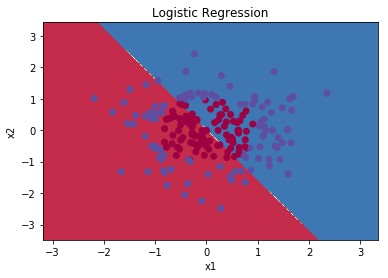

In [24]:
# Plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: clf.predict(x), X, Y[0,:])
plt.title("Logistic Regression")

err=1/(1+np.exp(-clf.intercept_-np.dot(clf.coef_,X))) #paso de verificación de cálculo
errm=clf.predict_proba(X.T)
dif=err-errm[:,1]
print(dif)
erro=clf.predict(X.T)
print(erro)

wl=clf.coef_
inte=clf.intercept_
print(inte)
print(wl)

# Print accuracy
LR_predictions = clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")
print(clf.coef_)

In [29]:
gaussian_quantiles= load_extra_datasets()
X, Y=gaussian_quantiles
#train_data,output=X.T,Y.reshape(1, Y.shape[0])
train_data, output = X,Y
print(train_data.shape)
print(output.shape)


(200, 2)
(200,)


In [0]:
input_size = 2
output_size = 1
hiden_layer_size = 4

#tf.keras.sequential is a function used to "stack layers"
#Our model's name is model
model = tf.keras.Sequential([
    #we need to flat images to get them a vector
    #First line in sequential function is used to delcare our input layer
    #tf.keras.layers.Flatten(input_shape = (2,200,1)),
    #tf.keras.layers.Dense(output_size) takes the inputs, provided to the model and calculates the dot product of the
    #inputs and the weights and adds the bias.
    #This is also where we can apply an activation function
    tf.keras.layers.Dense(hiden_layer_size, activation='tanh'),
    #We create the second hidden layer the same way
    tf.keras.layers.Dense(hiden_layer_size, activation='tanh'),
    #Output layer
    tf.keras.layers.Dense(output_size, activation = 'sigmoid')

])


In [0]:
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)
model.compile(optimizer=custom_optimizer, loss='binary_crossentropy', metrics = ['accuracy'])
#model.summary()

In [51]:
#Choose number of epochs
NUM_EPOCHS = 500

model.fit(train_data,output, epochs = NUM_EPOCHS, verbose=1)
#print(train_data.shape)

Epoch 1/500
200/200 [==============================] - 0s 148us/sample - loss: 0.1447 - acc: 0.9950
Epoch 2/500
200/200 [==============================] - 0s 128us/sample - loss: 0.1434 - acc: 0.9950
Epoch 3/500
200/200 [==============================] - 0s 119us/sample - loss: 0.1430 - acc: 0.9950
Epoch 4/500
200/200 [==============================] - 0s 125us/sample - loss: 0.1422 - acc: 0.9950
Epoch 5/500
200/200 [==============================] - 0s 125us/sample - loss: 0.1418 - acc: 0.9950
Epoch 6/500
200/200 [==============================] - 0s 111us/sample - loss: 0.1409 - acc: 0.9950
Epoch 7/500
200/200 [==============================] - 0s 116us/sample - loss: 0.1402 - acc: 0.9950
Epoch 8/500
200/200 [==============================] - 0s 115us/sample - loss: 0.1398 - acc: 0.9950
Epoch 9/500
200/200 [==============================] - 0s 115us/sample - loss: 0.1398 - acc: 0.9950
Epoch 10/500
200/200 [==============================] - 0s 119us/sample - loss: 0.1387 - acc: 0.9950